## Sliding window analysis + average between subjects

We calculate the connectivity matrix for each timepoint for each subject. Then, we take the average over all subjects. The final result is stored in "../Data/sliding_all_'+str(slide)+'.npy"

In [1]:
import numpy as np
import time
import json
import matplotlib.pyplot as plt
from scipy import linalg
from statsmodels.tsa.stattools import adfuller
from scipy.spatial.distance import squareform
from scipy.stats import zscore
%run functions-py.py

In [2]:
X=np.load('../../../Documentos/Mapper/Data/ts_data_2.npy')

In [3]:
np.shape(X[:,:,:])

(193, 268, 492)

In [4]:
file="../Data/my_rois_net1_ordered.json"

### Dyn analysis

In [5]:
networks=['Ventral-Attention','Dorsal-Attention','Salience','Frontal-Parietal','Default']
my_dict=regions_from_json(file,networks,verbose=False)
regions=my_dict['array']
lengths=my_dict['length']

In [6]:
lengths

[4, 4, 10, 20, 44]

In [7]:
with open("../Data/all_reg_sort.txt", "r") as read_file:
    vector=read_file.read().split(' ')
regions2=[]
for i in range(len(vector)):
    x=int(vector[i])-1
    regions2.append(x)

### Static Correlation

In [8]:
sliding=dyn_corr_isc(X[:,regions,:],slide=193,verbose=True)
print(sliding.shape)
sliding_all=np.mean(sliding,axis=2)

Assuming 492 subjects with 193 time points and 82 voxel(s) or ROI(s).

99%(1, 3321, 492)


Text(0, 0.4, 'Default')

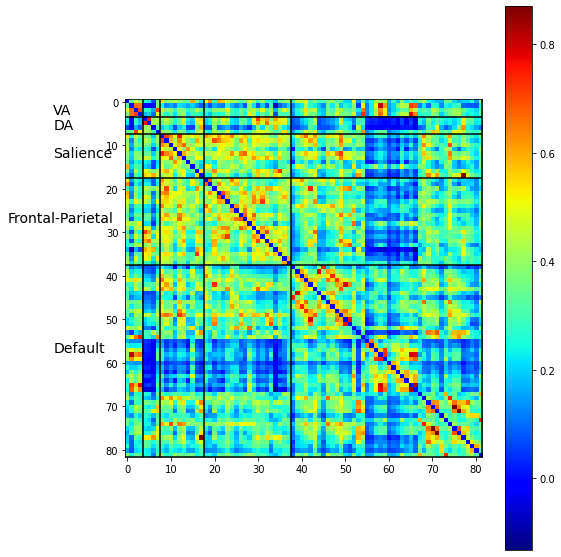

In [9]:
plt.figure(figsize=(8,10))
plt.imshow(squareform(np.ravel(sliding_all),force='tomatrix'),cmap=plt.get_cmap('jet'))
plt.colorbar()
l=-1
for i in lengths:
    l=l+i
    plt.axvline(x=l+0.5,color='black')
    plt.axhline(y=l+0.5,color='black')
plt.text(0, 0.73, 'VA', fontsize=14, transform=plt.gcf().transFigure)
plt.text(0, 0.71, 'DA', fontsize=14, transform=plt.gcf().transFigure)
plt.text(0, 0.67, 'Salience', fontsize=14, transform=plt.gcf().transFigure)
plt.text(-0.08, 0.58, 'Frontal-Parietal', fontsize=14, transform=plt.gcf().transFigure)
plt.text(0, 0.4, 'Default', fontsize=14, transform=plt.gcf().transFigure)

In [10]:
lengths2=[15,2,13,14]

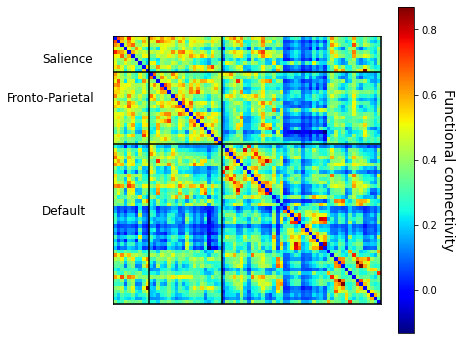

In [13]:
fig, ax = plt.subplots(figsize=(6,6))

plt.imshow(squareform(np.ravel(sliding_all),force='tomatrix')[8:,8:],cmap=plt.get_cmap('jet'))
cbar=plt.colorbar()
cbar.ax.set_ylabel('Functional connectivity',rotation=270,fontsize=14,labelpad=18)
l=-1
for i in lengths[2:]:
    l=l+i
    plt.axvline(x=l+0.5,color='black')
    plt.axhline(y=l+0.5,color='black')
l=29
# for i in lengths2:
#     l=l+i
#     plt.axvline(x=l+0.5,color='gray')
#     plt.axhline(y=l+0.5,color='gray')
plt.text(-0.04, 0.75, 'Salience', fontsize=12, transform=plt.gcf().transFigure)
plt.text(-0.12, 0.66, 'Fronto-Parietal', fontsize=12, transform=plt.gcf().transFigure)
plt.text(-0.04, 0.4, 'Default', fontsize=12, transform=plt.gcf().transFigure)

ax.set_xticks([])
ax.set_yticks([])

fig.savefig('../Imagenes/avance_3/static_fc.pdf',bbox_inches='tight')

In [23]:
#### Save only Sal-FP-Def
static_all=squareform(np.ravel(sliding_all),force='tomatrix')[8:,8:]
static_all=squareform(static_all)
static_all.shape
np.save('../Data/static_all.npy',static_all)

### Dynamic correlation

In [9]:
## dyn_corr_isc calculates the correlation for each timepoint for every pair of ROIS and every subject.

In [10]:
suspense=np.load("../Data/resampled_suspense.npy")

In [36]:
slide=20

In [37]:
slidings=[]

In [38]:
l=123
k =492 % l

print(l,k)

123 0


In [39]:
l=100
k=int(492/l) +1 
for i in range(k):
    sliding=dyn_corr_isc(X[:,regions,i*l:(i+1)*l],slide=slide,verbose=True,summary_statistic=np.mean)
    slidings.append(sliding)
    print(i)
    time.sleep(10)

Assuming 100 subjects with 193 time points and 82 voxel(s) or ROI(s).

99%0
Assuming 100 subjects with 193 time points and 82 voxel(s) or ROI(s).

99%1
Assuming 100 subjects with 193 time points and 82 voxel(s) or ROI(s).

99%2
Assuming 100 subjects with 193 time points and 82 voxel(s) or ROI(s).

99%3
Assuming 92 subjects with 193 time points and 82 voxel(s) or ROI(s).

98%4


In [40]:
sliding_all=np.mean(np.stack(slidings,axis=2),axis=2)

In [41]:
#sliding_all is a matrix 175 x squareform(reg x reg)
#It should be the one 
t_s, r_r = sliding_all.shape
print(t_s,r_r)

174 3321


In [42]:
np.save('../Data/sliding_all_'+str(slide)+'.npy',sliding_all)